<a href="https://colab.research.google.com/github/joanalawer/Capstone-Project/blob/main/Using_Random_Forest_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Tile : Heart Disease Prediction

Goal : Predict the heart disease risk of patients.

Author Name : Joana Lawer & Samuel Osei

### Loading Data

In [2]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# df is the variable name of our dataset
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Data/framingham.csv')
df.head(5)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,male,39,4.0,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1,female,46,2.0,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,0
2,2,male,48,1.0,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,0
3,3,female,61,3.0,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,1
4,4,female,46,3.0,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# Load the dataset and view first 10 entries. (Use if dataset is in the same folder as notebook)
# df = pd.read_csv('framingham.csv')
# df.head(10)

In [4]:
# View shape of dataset (number of rows and columns)
# df.shape
print ('No. of Rows :', df.shape[0], '\nNo. of Columns : ', df.shape[1])

No. of Rows : 4238 
No. of Columns :  17


- The columns represent the features and the rows represent the observations

In [5]:
#  View statistical info of the dataset
df.describe()

,Unnamed: 0,age,education,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4209.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,2118.500000,49.584946,1.978950,9.003089,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,1223.549549,8.572160,1.019791,11.920094,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,1059.250000,42.000000,1.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,2118.500000,49.000000,2.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,3177.750000,56.000000,3.000000,20.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,4237.000000,70.000000,4.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
# View the datatype attributes of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       4238 non-null   int64  
 1   sex              4238 non-null   object 
 2   age              4238 non-null   int64  
 3   education        4133 non-null   float64
 4   currentSmoker    4238 non-null   object 
 5   cigsPerDay       4209 non-null   float64
 6   BPMeds           4185 non-null   object 
 7   prevalentStroke  4238 non-null   object 
 8   prevalentHyp     4238 non-null   object 
 9   diabetes         4238 non-null   object 
 10  totChol          4188 non-null   float64
 11  sysBP            4238 non-null   float64
 12  diaBP            4238 non-null   float64
 13  BMI              4219 non-null   float64
 14  heartRate        4237 non-null   float64
 15  glucose          3850 non-null   float64
 16  TenYearCHD       4238 non-null   int64  
dtypes: float64(8),

In [7]:
# Check the categorical coulumns in the dataset
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(cat_cols)

['sex', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


In [8]:
print(f"{'Feature': <20} \t {'No. of values': <20}")
print('-'*40)
for col in cat_cols:
    print(f"{col: <20} \t {df[col].nunique(): <20}")

Feature              	 No. of values       
----------------------------------------
sex                  	 2                   
currentSmoker        	 2                   
BPMeds               	 2                   
prevalentStroke      	 2                   
prevalentHyp         	 2                   
diabetes             	 2                   


We see that all categorical values have two distint values each. Sex has male and female, while currentSmoker, BPMeds, prevalentStroke, prevalentHyp and diabetes have yes or no.

In [9]:
# Check for missing values in each feature
# df.isnull().sum()
print(f"{'Feature': <20} \t {'no. missing values': <20} \t {'Percantage of missing values': <20}")
for col in df.columns:
    print(f"{col: <20} \t {df[col].isna().sum(): <20} \t {np.round(df[col].isna().sum()/df.shape[0],2)*100}%")

Feature              	 no. missing values   	 Percantage of missing values
Unnamed: 0           	 0                    	 0.0%
sex                  	 0                    	 0.0%
age                  	 0                    	 0.0%
education            	 105                  	 2.0%
currentSmoker        	 0                    	 0.0%
cigsPerDay           	 29                   	 1.0%
BPMeds               	 53                   	 1.0%
prevalentStroke      	 0                    	 0.0%
prevalentHyp         	 0                    	 0.0%
diabetes             	 0                    	 0.0%
totChol              	 50                   	 1.0%
sysBP                	 0                    	 0.0%
diaBP                	 0                    	 0.0%
BMI                  	 19                   	 0.0%
heartRate            	 1                    	 0.0%
glucose              	 388                  	 9.0%
TenYearCHD           	 0                    	 0.0%


In [10]:
# drop first column by index
df = df.drop(df.columns[0], axis=1)
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,male,39,4.0,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,0
1,female,46,2.0,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,0
2,male,48,1.0,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,0
3,female,61,3.0,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,1
4,female,46,3.0,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,0


The first column of the dataset shows the numbering for the observations and willnot be relevant to the analysis and project as such we drop it.

In [11]:
df.shape # Show the number of columns after dropping the first column

(4238, 16)

### Encode categorical features

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


From the above preview the categorical features have been encoded into 0 and 1.

*   Male = 1; Female = 0
*   Yes = 1; No = 0

All values in the dataset are now numerical.



In [13]:
# Check the number of female who have TenYearCHD and those do not as x an d y variables
x = df[df['TenYearCHD'] == 1]['sex'].sum()
y = df[df['TenYearCHD'] == 0]['sex'].sum()
print(f"No. of female with TenYearCHD : {x}")
print(f"No. of female without TenYearCHD : {y}")

No. of female with TenYearCHD : 343
No. of female without TenYearCHD : 1476


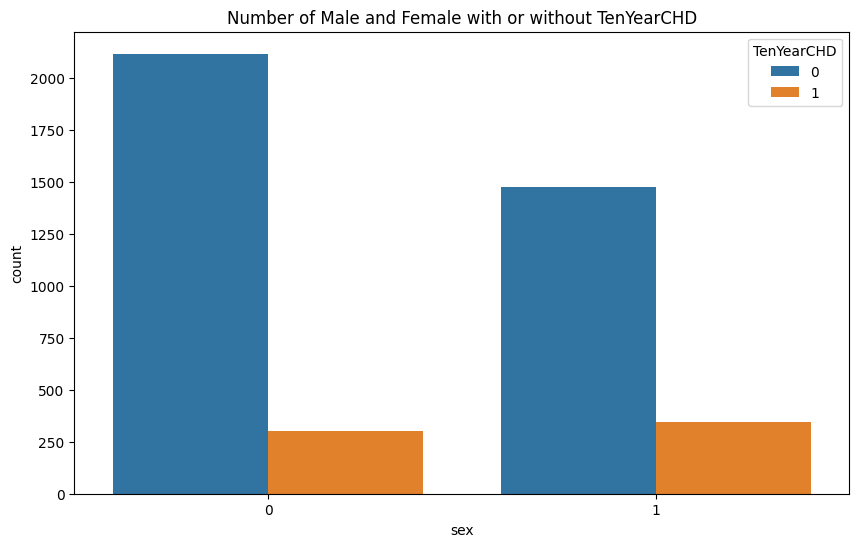

In [14]:
# Plot a graph for the number of male and female who have TenYearCHD and those
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='TenYearCHD', data=df)
plt.title('Number of Male and Female with or without TenYearCHD')
plt.show()

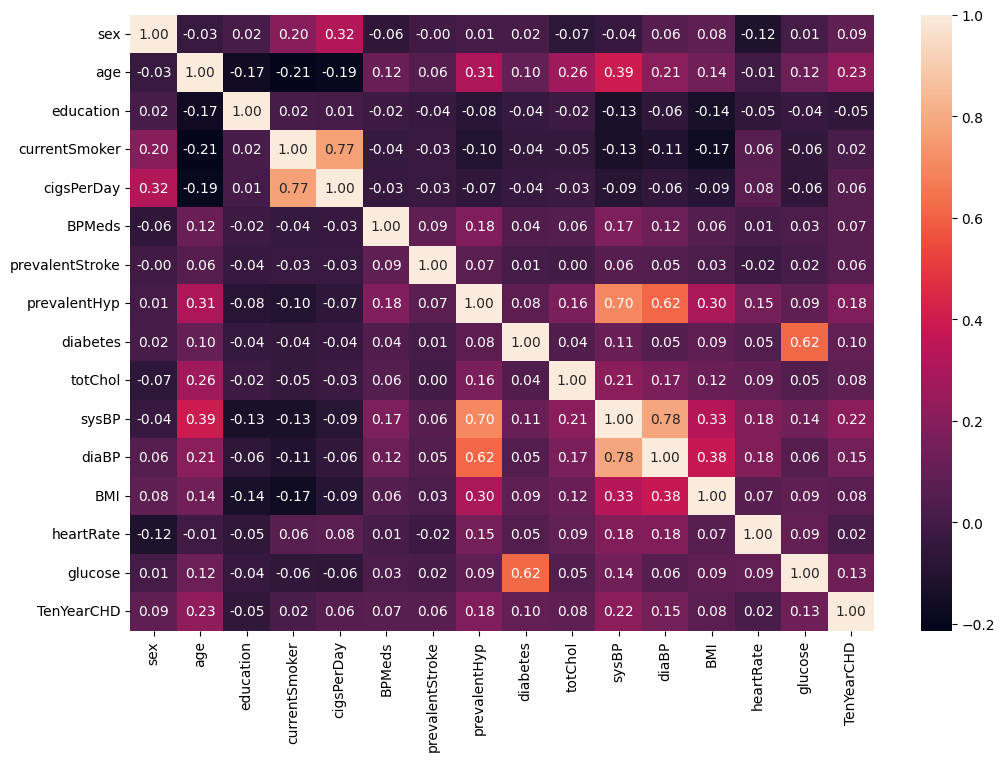

In [15]:
# Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

The correlation matrix provides insights into the relationships between different features in the dataset. The correlation coefficient values range from -1 to 1, indicating the strength and direction of the relationship between the features.

### Key Points of the Correlation Matrix
1. Diagonal Elements:
- The diagonal elements of the matrix are all 1, as each feature is perfectly correlated with itself.

2. Correlation Values:
- Positive values indicate a positive correlation: as one feature increases, the other feature tends to increase.
- Negative values indicate a negative correlation: as one feature increases, the other feature tends to decrease.
- Values close to 0 indicate little to no linear relationship between the features.
3. Heatmap Colors:
- The color intensity represents the magnitude of the correlation. Darker colors indicate stronger correlations (either positive or negative), while lighter colors indicate weaker correlations.

### Notable Correlations
- Sex and Current Smoker: Correlation = 0.20
 - There is a moderate positive correlation between being male and being a current smoker.
- Age and TotChol: Correlation = 0.26
 - There is a moderate positive correlation between age and total cholesterol level.
- Age and SysBP: Correlation = 0.39
 - There is a stronger positive correlation between age and systolic blood pressure.
- Current Smoker and CigsPerDay: Correlation = 0.77
 - There is a very strong positive correlation between being a current smoker and the number of cigarettes smoked per day.
- PrevalentHyp and SysBP: Correlation = 0.70
 - There is a strong positive correlation between having hypertension and systolic blood pressure.
- SysBP and DiaBP: Correlation = 0.78
 - There is a very strong positive correlation between systolic blood pressure and diastolic blood pressure.
- Diabetes and Glucose: Correlation = 0.62
 - There is a strong positive correlation between having diabetes and glucose level.
- Age and TenYearCHD: Correlation = 0.23
 - There is a moderate positive correlation between age and the 10-year risk of coronary heart disease.

### Feature Selection and Splitting Data


In [16]:
# Import libraries from scikitlearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
print(X.shape)
print(y.shape)

(4238, 15)
(4238,)


The target variable for our model is "TenYearCHD".

X is a new DataFrame that contains all the columns from the original DataFrame df, that will be used to train the machine learning model, except for the TenYearCHD column.

y represents the target variable (dependent variable) that the model will learn to predict.

This prepares the data for machine learning by separating the independent variables (features) from the dependent variable (target).

In [29]:
# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Training and Evaluation

In [32]:
# Handle missing values using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean of the column
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Predict and Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8537735849056604
Confusion Matrix:
 [[713  11]
 [113  11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       724
           1       0.50      0.09      0.15       124

    accuracy                           0.85       848
   macro avg       0.68      0.54      0.54       848
weighted avg       0.81      0.85      0.81       848



This output is a summary of the performance of a Random Forest model on the test dataset.

Accuracy: 0.8537735849056604
  measures the proportion of correctly predicted instances (both positive and negative) out of the total instances. In this case, the accuracy is approximately 85.38%, meaning that 85.38% of the predictions made by the model are correct.

The Confusion Matrix:
 [[713  11]
 [113  11]]
 helps visualize the performance of the classification model by showing the counts of true positive, true negative, false positive, and false negative predictions.
*   True Negatives (TN): 713
*   False Positives (FP): 11
*   False Negatives (FN): 113
*   True Positives (TP):11

The classification report provides detailed metrics for each class (in this case, classes 0 and 1).

Class 0 (No CHD)

* Precision: 0.86.
The proportion of true negative predictions (class 0) among all negative predictions.
Out of all predictions for class 0, 84% were correct.
* Recall: 0.98.
The proportion of true negative predictions (class 0) among all actual negatives.
Out of all actual class 0 instances, 98% were correctly predicted as class 0.
* F1-Score: 0.92.
The harmonic mean of precision and recall. Higher value indicates better performance.

Class 1 (CHD)

- Precision: 0.50.
The proportion of true positive predictions (class 1) among all positive predictions.
Out of all predictions for class 1, 50% were correct.
- Recall: 0.09.
The proportion of true positive predictions (class 1) among all actual positives.
Out of all actual class 1 instances, only 9% were correctly predicted as class 1.
- F1-Score: 0.15.
The harmonic mean of precision and recall. For class 1, it balances the two metrics into a single score, which is quite low

### Overall Metrics

- Accuracy: 0.85
 - The overall accuracy of the model across both classes is 85%.
- Macro Average: Precision = 0.68, Recall = 0.54, F1-Score = 0.54
 - The macro average calculates the metrics for each class independently and then takes the average, giving equal weight to each class.
- Weighted Average: Precision = 0.81, Recall = 0.85, F1-Score = 0.81
 - The weighted average takes into account the support (number of true instances) of each class, giving more weight to the majority class.

### Interpretation

- High Accuracy: The model has a high overall accuracy (85.38%), indicating it is generally good at predicting the correct class.
- Class Imbalance: There is an imbalance between the classes (724 instances of class 0 vs. 124 instances of class 1), which can impact performance metrics.
- Poor Performance for Class 1:
 - Low Precision and Recall: The model performs poorly in predicting class 1 (CHD). The precision is low (0.50), meaning many of the positive predictions are incorrect. The recall is very low (0.09), meaning the model misses many actual positive instances.
 - Low F1-Score: The F1-score for class 1 is also low (0.15), indicating poor overall performance in predicting this class.

### Feature Importance

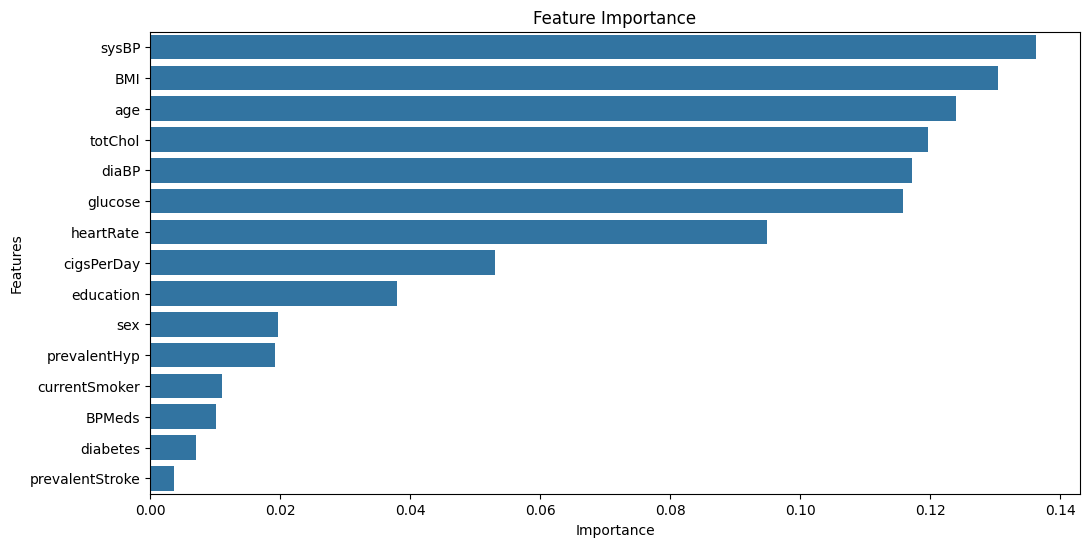

In [36]:
feature_importances = clf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Features': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Features', data=importance_df)
plt.title('Feature Importance')
plt.show()

This visualization helps in understanding which features have the most significant impact on the model's predictions and can provide insights for feature selection or further analysis.

 Systolic blood pressure, BMI, and age are the top three most important features, indicating that these should be closely monitored and managed to reduce the risk of heart disease.

### Cross-Validation and Hyperparameter Tuning

In [40]:
#  Cross validation

In [41]:
# Hyperparameter Tuning